In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./housing.csv')
#columns_name = list(df.columns)
#print(columns_name)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


longitude: longtitude coordinate

latitude: latitude coordinate

housing_median_age: house age

total_rooms: Number of rooms in a block

total_bedroom: Number of bedrooms in a block

population: Number of people in a block 

households: Number of households

median_income: Median income of household in each block

median_house_value: Median house value in each block

ocean_proximity: whether the house near bay, inland, <1h from ocean, near ocean or in island

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This function help visualize general idea about the statistical distribution in this dataset. 
Overall, there are multiple outliers in this dataset that need to be remove.

In [21]:
df = df[df['median_house_value'] < 500000]

Remove outlier where housing value is far from the mean

In [5]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


This function finds the null value in the dataset. In this case, total_bedrooms has 207 null value. It makes sense to drop these null in order to visualize and train the data

In [6]:
print(df.shape[0]) # number of row before drop NA value
df = df.dropna()
print(df.shape[0]) # number of row after drop NA value

19648
19448


In [7]:
print(df.duplicated().sum())

0


This dataset does not have any duplicated row. Therefore, we do not need to remove anything

In [8]:
df = df.astype({'total_rooms':'int64', 'housing_median_age':'int64'})

In [9]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [10]:
df['population_house'] = df['population'] / df['total_bedrooms']

Find out how many people living in one bedrooms in each block. 

In [11]:
df = df.drop(columns=['longitude', 'latitude'])

In this dataset, longitude and latitude are not necessary for visualize or training the model. As a result, I choose to drop these 2 columns

<AxesSubplot:>

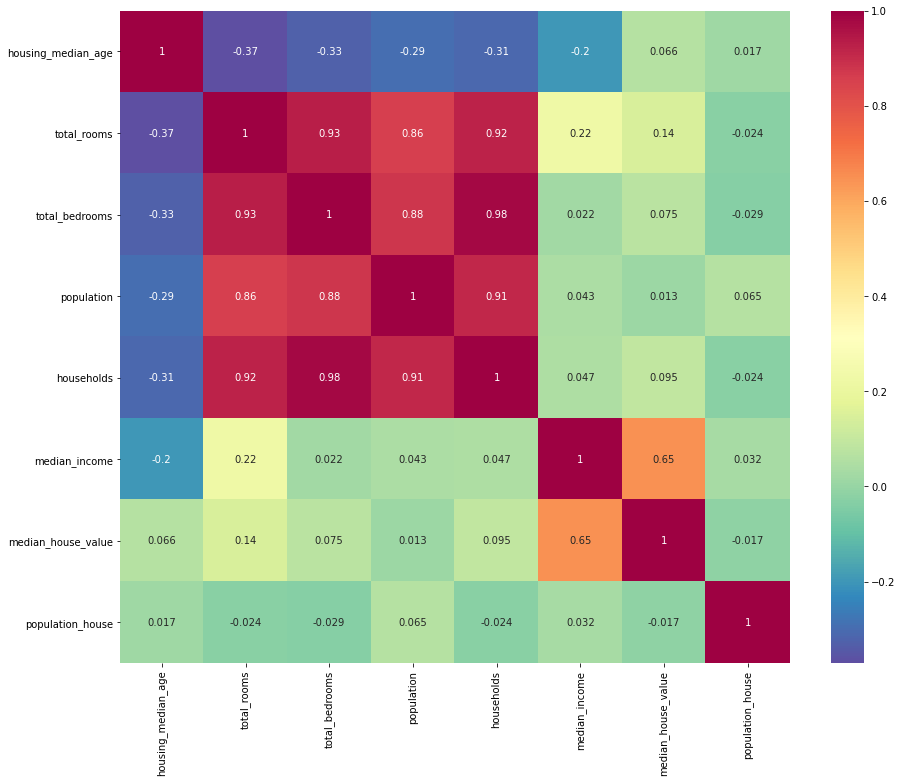

In [12]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap="Spectral_r")

This graph shows the correlation between each variable in the dataset. We can see how these variables affect other variables by looking at the graph.

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

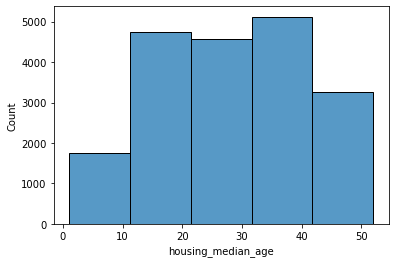

In [13]:
sns.histplot(df, x="housing_median_age", bins=5)

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

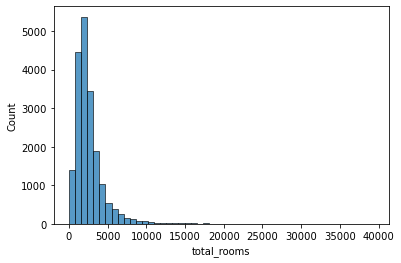

In [14]:
sns.histplot(df, x="total_rooms", bins=50)

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

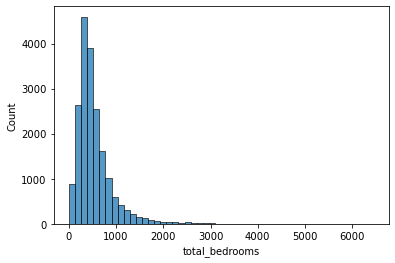

In [15]:
sns.histplot(df, x="total_bedrooms", bins=50)

<AxesSubplot:xlabel='population', ylabel='Count'>

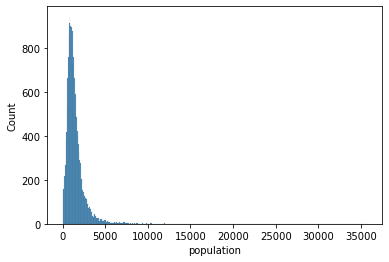

In [16]:
sns.histplot(df, x="population")

<AxesSubplot:xlabel='households', ylabel='Count'>

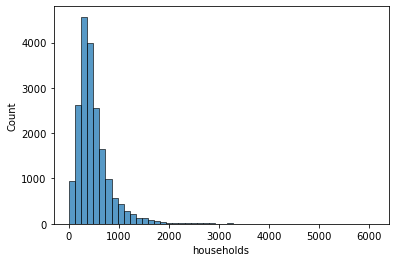

In [17]:
sns.histplot(df, x="households", bins=50)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

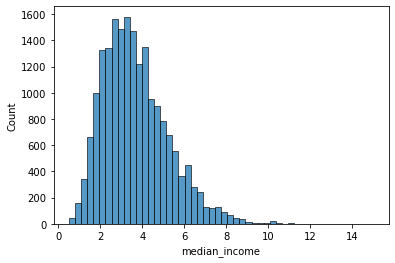

In [18]:
sns.histplot(df, x="median_income", bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

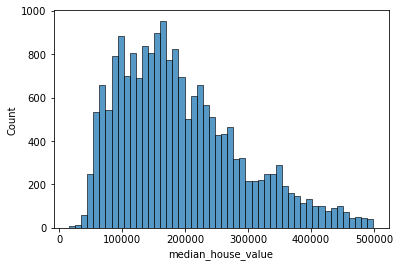

In [19]:
sns.histplot(df, x="median_house_value")

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

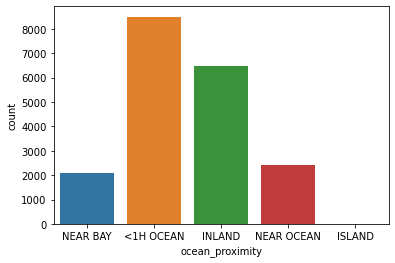

In [20]:
sns.countplot(data=df, x="ocean_proximity")